<a href="https://colab.research.google.com/github/itimes-digital/maratona_ibm/blob/master/estudo_desafio_uninassau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('sample_data/dataset_desafio_2.csv')

In [3]:
dataset.head()

,MATRICULA,NOME,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL
0,502375,Márcia Illiglener,0,0,0,0,6.2,5.8,4.6,5.9,0.0,2,4,3,EXATAS
1,397093,Jason Jytereoman Izoimum,0,0,0,0,6.0,6.2,5.2,4.5,1.0,2,4,3,EXATAS
2,915288,Bartolomeu Inácio da Gama,0,0,0,0,7.3,6.7,7.1,7.2,0.0,5,0,3,HUMANAS
3,192652,Fernanda Guedes,1,3,1,1,0.0,0.0,0.0,0.0,1.0,4,4,4,DIFICULDADE
4,949491,Alessandre Borba Gomes,1,3,1,1,0.0,0.0,0.0,0.0,1.0,5,2,5,DIFICULDADE


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MATRICULA       20000 non-null  int64  
 1   NOME            20000 non-null  object 
 2   REPROVACOES_DE  20000 non-null  int64  
 3   REPROVACOES_EM  20000 non-null  int64  
 4   REPROVACOES_MF  20000 non-null  int64  
 5   REPROVACOES_GO  20000 non-null  int64  
 6   NOTA_DE         20000 non-null  float64
 7   NOTA_EM         20000 non-null  float64
 8   NOTA_MF         20000 non-null  float64
 9   NOTA_GO         16284 non-null  float64
 10  INGLES          16372 non-null  float64
 11  H_AULA_PRES     20000 non-null  int64  
 12  TAREFAS_ONLINE  20000 non-null  int64  
 13  FALTAS          20000 non-null  int64  
 14  PERFIL          20000 non-null  object 
dtypes: float64(5), int64(8), object(2)
memory usage: 2.3+ MB


In [ ]:
dataset['PERFIL'].value_counts()

EXATAS         8230
DIFICULDADE    7001
HUMANAS        3196
MUITO_BOM       902
EXCELENTE       671
Name: PERFIL, dtype: int64

In [104]:
dataset_2 = dataset

In [105]:
colunas = ['REPROVACOES_DE','REPROVACOES_EM','REPROVACOES_MF','REPROVACOES_GO','NOTA_DE','NOTA_EM',
           'NOTA_MF','NOTA_GO','H_AULA_PRES', 'TAREFAS_ONLINE','FALTAS','INGLES', 'PERFIL']
dataset_2 = dataset[colunas]

In [ ]:
dataset_2 = dataset_2.dropna(subset = dataset_2.columns)

In [ ]:
dataset_2 = dataset_2.dropna(subset = ['NOTA_GO'])

In [106]:
dataset_2 = dataset_2.fillna(0)

In [96]:
dataset_2 = dataset_2.fillna(dataset_2.std())

In [52]:
dataset_2.isnull().sum()

REPROVACOES_DE    0
REPROVACOES_EM    0
REPROVACOES_MF    0
REPROVACOES_GO    0
NOTA_DE           0
NOTA_EM           0
NOTA_MF           0
NOTA_GO           0
H_AULA_PRES       0
TAREFAS_ONLINE    0
FALTAS            0
INGLES            0
PERFIL            0
dtype: int64

In [53]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REPROVACOES_DE  20000 non-null  int64  
 1   REPROVACOES_EM  20000 non-null  int64  
 2   REPROVACOES_MF  20000 non-null  int64  
 3   REPROVACOES_GO  20000 non-null  int64  
 4   NOTA_DE         20000 non-null  float64
 5   NOTA_EM         20000 non-null  float64
 6   NOTA_MF         20000 non-null  float64
 7   NOTA_GO         20000 non-null  float64
 8   H_AULA_PRES     20000 non-null  int64  
 9   TAREFAS_ONLINE  20000 non-null  int64  
 10  FALTAS          20000 non-null  int64  
 11  INGLES          20000 non-null  float64
 12  PERFIL          20000 non-null  object 
dtypes: float64(5), int64(7), object(1)
memory usage: 2.0+ MB


In [107]:
dataset_2 = dataset_2.sample(n=16500)

In [108]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16500 entries, 16149 to 8724
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REPROVACOES_DE  16500 non-null  int64  
 1   REPROVACOES_EM  16500 non-null  int64  
 2   REPROVACOES_MF  16500 non-null  int64  
 3   REPROVACOES_GO  16500 non-null  int64  
 4   NOTA_DE         16500 non-null  float64
 5   NOTA_EM         16500 non-null  float64
 6   NOTA_MF         16500 non-null  float64
 7   NOTA_GO         16500 non-null  float64
 8   H_AULA_PRES     16500 non-null  int64  
 9   TAREFAS_ONLINE  16500 non-null  int64  
 10  FALTAS          16500 non-null  int64  
 11  INGLES          16500 non-null  float64
 12  PERFIL          16500 non-null  object 
dtypes: float64(5), int64(7), object(1)
memory usage: 1.8+ MB


In [ ]:
dataset_2['PERFIL'].unique()

array(['EXATAS', 'HUMANAS', 'DIFICULDADE', 'MUITO_BOM', 'EXCELENTE'],
      dtype=object)

In [41]:
dataset_2.describe()

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,INGLES
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,0.243400,0.243200,0.300300,0.292700,5.194680,5.079470,4.816720,4.155178,5.116100,3.13280,4.06300,0.618934
std,0.616275,0.615704,0.679387,0.660053,2.525184,2.526986,2.732075,2.393276,4.109344,1.85335,1.67132,0.437246
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,5.200000,4.800000,4.700000,2.509209,2.000000,2.00000,3.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,6.200000,5.900000,5.500000,5.000000,4.000000,3.00000,4.00000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,6.700000,6.700000,6.500000,5.900000,6.000000,5.00000,6.00000,1.000000
max,3.000000,3.000000,3.000000,3.000000,9.000000,9.400000,11.500000,9.600000,25.000000,7.00000,8.00000,1.000000


In [42]:
dataset_2.head()

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,INGLES,PERFIL
6087,1,1,1,3,0.0,0.0,0.0,0.000000,5,4,3,1.0,DIFICULDADE
12762,0,0,0,0,6.7,5.6,6.4,2.509209,3,1,7,1.0,EXATAS
19853,0,0,0,0,7.7,8.0,8.6,7.500000,17,3,3,0.0,EXCELENTE
11277,0,0,0,0,7.2,6.7,5.8,6.400000,5,5,2,1.0,EXATAS
107,0,0,0,0,6.2,5.6,5.6,5.800000,2,1,6,1.0,EXATAS


In [109]:
previsores = dataset_2.loc[:, 'REPROVACOES_DE':'FALTAS']
previsores.head()

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,H_AULA_PRES,TAREFAS_ONLINE,FALTAS
16149,0,0,0,0,5.4,4.1,5.3,4.7,2,3,3
11571,1,1,1,1,0.0,0.0,0.0,0.0,5,5,3
10745,0,0,0,0,6.7,6.2,5.7,5.8,0,3,4
5264,0,0,0,0,5.8,5.9,5.0,0.0,2,3,5
1645,0,0,0,0,5.4,4.6,5.5,0.0,2,2,3


In [110]:
classe = dataset_2['PERFIL']
classe

16149         EXATAS
11571    DIFICULDADE
10745         EXATAS
5264          EXATAS
1645     DIFICULDADE
            ...     
12038    DIFICULDADE
5876          EXATAS
6452          EXATAS
1941          EXATAS
8724       EXCELENTE
Name: PERFIL, Length: 16500, dtype: object

In [ ]:
previsores = previsores.join(pd.get_dummies(classe))
previsores

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,DIFICULDADE,EXATAS,EXCELENTE,HUMANAS,MUITO_BOM
0,0,0,0,0,6.2,5.8,4.6,5.900000,2,4,3,0,1,0,0,0
1,0,0,0,0,6.0,6.2,5.2,4.500000,2,4,3,0,1,0,0,0
2,0,0,0,0,7.3,6.7,7.1,7.200000,5,0,3,0,0,0,1,0
3,1,3,1,1,0.0,0.0,0.0,0.000000,4,4,4,1,0,0,0,0
4,1,3,1,1,0.0,0.0,0.0,0.000000,5,2,5,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,7.0,7.9,5.8,7.000000,9,5,6,0,1,0,0,0
19996,1,1,1,1,0.0,0.0,0.0,4.534101,3,2,5,1,0,0,0,0
19997,0,0,0,0,7.9,7.6,8.3,7.200000,8,3,1,0,0,1,0,0
19998,0,0,1,1,6.3,5.1,0.0,0.000000,3,2,6,1,0,0,0,0


In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

previsores = scaler.fit_transform(previsores)

In [112]:
from sklearn.model_selection import train_test_split
#Proporção de 25%
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, 
                                classe, 
                                test_size=0.3,
                                random_state=0)

In [119]:
from sklearn.ensemble import RandomForestClassifier

#criação do classificador
classificador = RandomForestClassifier(n_estimators=100,
                                       criterion='entropy', 
                                       random_state=0, 
                                       max_samples=1000)

In [120]:
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
precisao

0.8173737373737374

In [121]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[1325,  378,    0,   61,    0],
       [ 153, 1865,    0,   14,    0],
       [   0,   10,   95,   53,   10],
       [   0,    0,   14,  756,    7],
       [   0,   52,   31,  121,    5]])

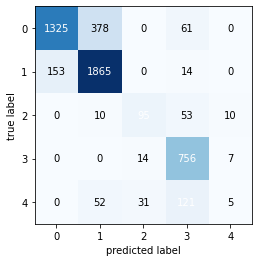

In [122]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=matriz)
plt.show()